CASE -

We are going to predict gold prices based on several other stock prices

Data Overview: 

This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

WORK FLOW -

Gold price data

Data Pre Processing

Data Analysis

Train Test Split

Random Forest Regressor Model

Prediction

Model Evaluation

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [2]:
# Importing the data

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Gold Price Prediction Using Random Forest Regressor\gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Last 5 rows of data

data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
# Checking shape of dataframe

data.shape

(2290, 6)

In [5]:
# Getting basic information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# Checking number of missing values

data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# Statistical measures of data

data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation between Various Features of Data

In [8]:
corr = data.corr()

<AxesSubplot:>

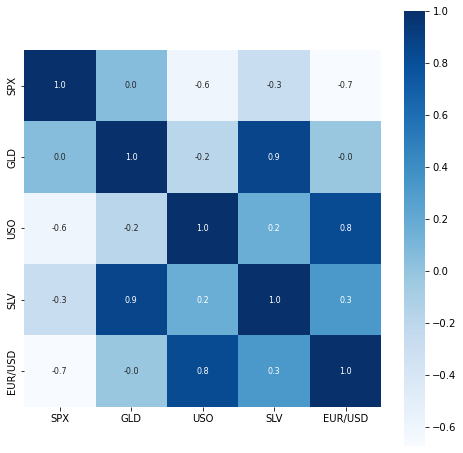

In [10]:
# Creating heatmap to understand the correlation

plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Inference from above graph -

As we are going to predict the gold price (GLD), its our target variable. GLD has positive correlation with silver (SLV), GLD has very low correlation with SPX & GLD has negative correlation with other variables. 

In [11]:
# Correlation values of GLD

print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

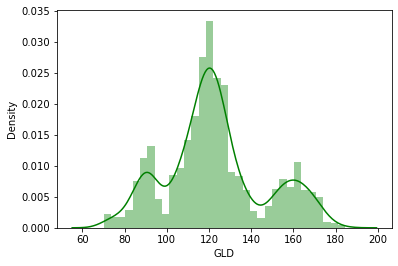

In [13]:
# Checking the distribution of gold price

sns.distplot(data['GLD'], color = 'green')

Inference from above graph -

We have majority of density values lying in the range of 120

Splitting features & target

In [14]:
x = data.drop(['Date', 'GLD'], axis = 1)
y = data['GLD']

In [15]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into Train & Test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [19]:
print(x.shape, x_train.shape, x_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training

Random Forest Regressor - Its an ensemble model means it consist more than 1 tree joined together, it is an ensemble model of decision trees. Nodes classifies the variables on certain range & based on the value of variable it passes to it to different nodes. There will be n number of decision trees in random forest, we will get different valus from trees & based on the mean, median or mode random forest will gives us the predicted value.

In [20]:
reg = RandomForestRegressor(n_estimators=100)

In [21]:
# Training the model

reg.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
# Prediction on test data

test_data_predict = reg.predict(x_test)
print(test_data_predict)

[168.69189972  81.95889985 115.95130014 127.45970073 120.65160117
 154.65539763 150.19369898 126.13650065 117.54239873 125.92890068
 116.77810093 171.36880065 141.76609886 168.08659893 115.16820008
 117.79140014 136.90700364 170.25480077 159.33640281 160.37179892
 155.14469993 125.48270022 175.41089884 157.29060307 125.1990005
  93.9828996   77.76190008 120.33329994 119.04439909 167.4379996
  88.19780059 125.22290042  90.93290049 117.35610035 121.16549894
 136.35900125 115.765001   115.22240064 147.40120001 107.15070108
 103.92080234  87.28499811 126.5234005  117.83740007 152.90559911
 119.69419978 108.28360011 108.11609838  93.05190072 127.08359798
  74.62780058 113.68939934 121.6514001  111.00089923 118.91609881
 120.56269947 159.39030023 168.76520132 147.13499708  85.90429874
  94.15470021  86.74089895  90.40839995 118.92190047 126.39640048
 127.47420017 170.80590064 122.33659934 117.57129872  99.07270036
 168.59060113 142.85969825 132.81130187 121.20910225 121.33219914
 119.6289004

In [23]:
# R Squared Error

error_score = metrics.r2_score(y_test, test_data_predict)
print('R Squared Error :', error_score)

R Squared Error : 0.9896861959863978


Comparing the actual values & predicted valus

In [24]:
y_test = list(y_test)

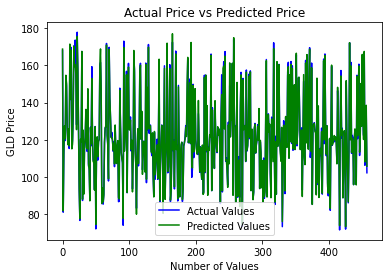

In [25]:
plt.plot(y_test, color = 'blue', label = 'Actual Values')
plt.plot(test_data_predict, color = 'green', label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

CONCLUSION - 

Our model is predicting the values very closely, our model is good for prediction.